# Markov processes

### Task 9

Simple simulation of Markov process

In [63]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


class TransitionMatrix:

    def __init__(self, matrix):
        self.matrix = matrix
        
    def transitions(self, state):
        return self.matrix[state]
        
    @property
    def raw(self):
        return np.matrix([list(self.matrix[state][1]) for state in self.matrix], dtype=float)

        
class MarkovChain:

    def __init__(self, transition_matrix, current):
        self.transition_matrix = transition_matrix
        self.current = current

    def next_state(self):
        transitions = self.transition_matrix.transitions(self.current)
        self.current = np.random.choice(a=list(transitions[0]), p=list(transitions[1]))

a) Calculate P^n for random n and find limit in n->inf

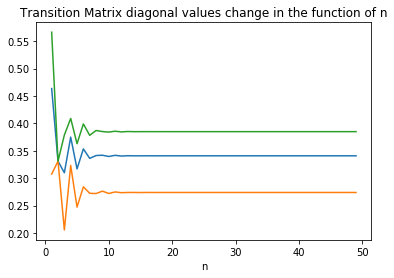

In [104]:
transitions = {'A': np.array([['A', 'B', 'C'], [0.0, 0.16, 0.84]]),
               'B': np.array([['A', 'B', 'C'], [0.64, 0.0, 0.36]]),
               'C': np.array([['A', 'B', 'C'], [0.43, 0.57, 0.0]])}

matrix = TransitionMatrix(transitions)

def get_data(matrix, power):
    results = []
    current = matrix
    for power in range(1, power):
        current = current * matrix
        results.append(np.array(current.diagonal())[0])
    return results

results = get_data(matrix.raw, 50)
x = np.arange(1,50)

plt.figure()
plt.plot(x, results)
plt.title("Transition Matrix diagonal values change in the function of n")
plt.xlabel("n")
plt.show()    

b)

In [46]:

chain = MarkovChain(matrix, 'A')

for _ in range(10):
    chain.next_state()
    print(chain.current)

C
A
B
C
A
C
A
A
C
A
